### 1. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import squarify as sq
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### 2. DATA PREPARATION

#### 2.1 Amazon's Balance 2020

In [2]:
balance_label = ["Activo Corriente" , "Activo no Corriente", "Pasivo Corriente", "Pasivo no Corriente", "Patrimonio Neto"]

In [3]:
values20 = [132733,188462,126385,101406,93404]
bal20_amz = pd.DataFrame(index = balance_label, data = values20)
bal20_amz.rename(columns = {0:"amount"}, inplace= True)

In [4]:
bal20_amz["amountf"] = "$" + bal20_amz["amount"].map("{:,.0f}".format)
activotot0 = bal20_amz.iloc[0,0] + bal20_amz.iloc[1,0]
bal20_amz["rel_activo"] = np.round(bal20_amz["amount"] / activotot0 *100,0).astype(int)

In [5]:
bal20_amz

,amount,amountf,rel_activo
Activo Corriente,132733,"$132,733",41
Activo no Corriente,188462,"$188,462",59
Pasivo Corriente,126385,"$126,385",39
Pasivo no Corriente,101406,"$101,406",32
Patrimonio Neto,93404,"$93,404",29


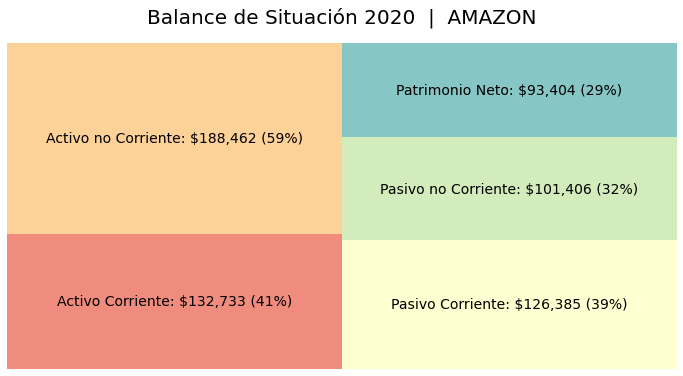

In [6]:
fig, ax = plt.subplots(figsize = (12,6))
plt.title("Balance de Situación 2020  |  AMAZON", fontsize = 20, pad = 20)

labels = [f'{balance}: {amount} ({rel}%)' for balance, amount, rel in zip(bal20_amz.index, bal20_amz.amountf.values, bal20_amz["rel_activo"])]

sq.plot(sizes = bal20_amz.amount, label = labels,
        color = sns.color_palette("Spectral", len(bal20_amz.amount)), 
        # pad = 0.01, 
        text_kwargs = {'fontsize': 14}, alpha = 0.7)

plt.axis("off")
plt.show()

#### 2.2 Amazon's Balance 2021

In [7]:
values21 = [161580,258969,142216,140038,138245]
bal21_amz = pd.DataFrame(index = balance_label, data = values21)
bal21_amz.rename(columns = {0:"amount"}, inplace= True)

In [8]:
bal21_amz["amountf"] = "$" + bal21_amz["amount"].map("{:,.0f}".format)
activotot1 = bal21_amz.iloc[0,0] + bal21_amz.iloc[1,0]
bal21_amz["rel_activo"] = np.round(bal21_amz["amount"] / activotot1 *100,0).astype(int)

In [9]:
bal21_amz

,amount,amountf,rel_activo
Activo Corriente,161580,"$161,580",38
Activo no Corriente,258969,"$258,969",62
Pasivo Corriente,142216,"$142,216",34
Pasivo no Corriente,140038,"$140,038",33
Patrimonio Neto,138245,"$138,245",33


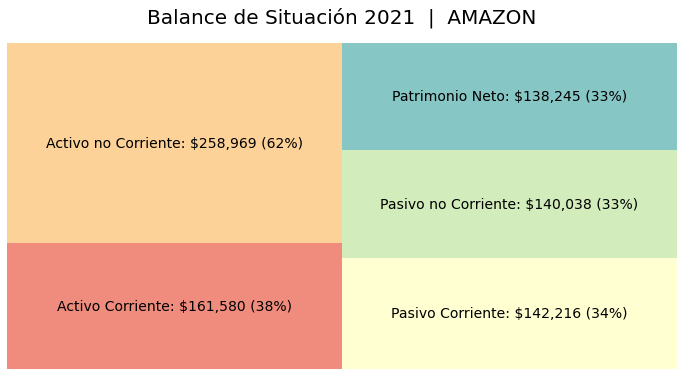

In [10]:
fig, ax = plt.subplots(figsize = (12,6))
plt.title("Balance de Situación 2021  |  AMAZON", fontsize = 20, pad = 20)

labels = [f'{balance}: {amount} ({rel}%)' for balance, amount, rel in zip(bal21_amz.index, bal21_amz.amountf.values, bal21_amz["rel_activo"])]

sq.plot(sizes = bal21_amz.amount, label = labels,
        color = sns.color_palette("Spectral", len(bal21_amz.amount)), 
        # pad = 0.01, 
        text_kwargs = {'fontsize': 14}, alpha = 0.7)

plt.axis("off")
plt.show()

#### 2.3 Walmart's Balance 2021

In [11]:
values21_wal = [90067,162429,92645,72320,80925]
bal21_wal = pd.DataFrame(index = balance_label, data = values21_wal)
bal21_wal.rename(columns = {0:"amount"}, inplace= True)

In [12]:
bal21_wal["amountf"] = "$" + bal21_wal["amount"].map("{:,.0f}".format)
activotot1w = bal21_wal.iloc[0,0] + bal21_wal.iloc[1,0]
bal21_wal["rel_activo"] = np.round(bal21_wal["amount"] / activotot1w *100,0).astype(int)

In [13]:
bal21_wal

,amount,amountf,rel_activo
Activo Corriente,90067,"$90,067",36
Activo no Corriente,162429,"$162,429",64
Pasivo Corriente,92645,"$92,645",37
Pasivo no Corriente,72320,"$72,320",29
Patrimonio Neto,80925,"$80,925",32


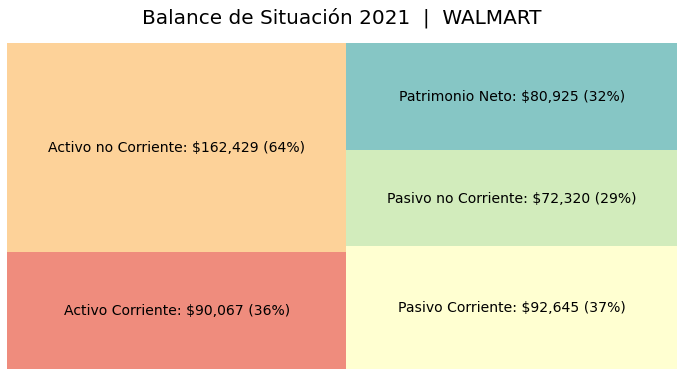

In [14]:
fig, ax = plt.subplots(figsize = (12,6))
plt.title("Balance de Situación 2021  |  WALMART", fontsize = 20, pad = 20)

labels = [f'{balance}: {amount} ({rel}%)' for balance, amount, rel in zip(bal21_wal.index, bal21_wal.amountf.values, bal21_wal["rel_activo"])]

sq.plot(sizes = bal21_wal.amount, label = labels,
        color = sns.color_palette("Spectral", len(bal21_wal.amount)), 
        # pad = 0.01, 
        text_kwargs = {'fontsize': 14}, alpha = 0.7)

plt.axis("off")
plt.show()

### 3. AREA PLOTS

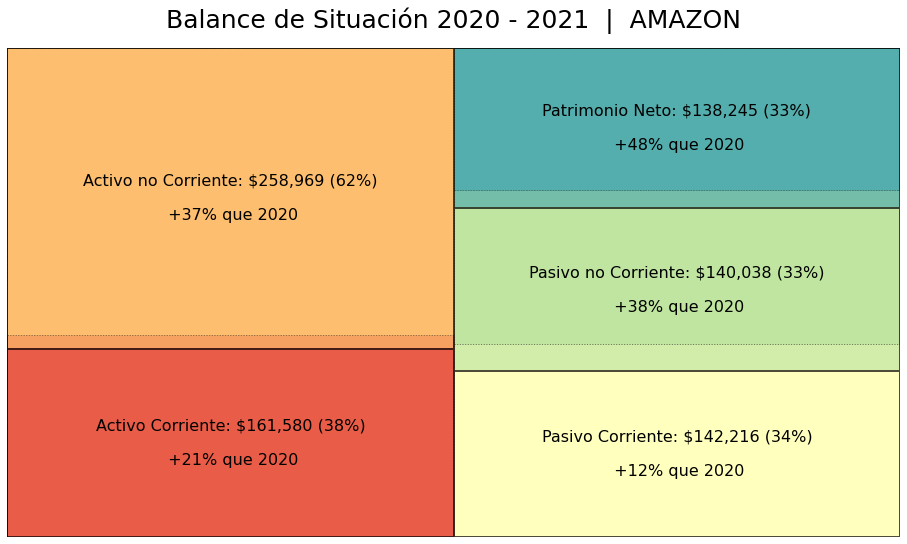

In [15]:
fig, ax = plt.subplots(figsize = (16,9))
plt.title("Balance de Situación 2020 - 2021  |  AMAZON", fontsize = 25, pad = 20)

labels = [f'{balance}: {amount1f} ({rel}%)\n\n \
+{int((amount1-amount0)/amount0*100)}% que 2020' \
          for balance, amount0, amount1, amount1f, rel in zip(bal21_amz.index, bal20_amz.amount.values, bal21_amz.amount.values, bal21_amz.amountf.values, bal21_amz["rel_activo"])]

sq.plot(sizes = bal21_amz.amount, 
        label = labels,
        color = sns.color_palette("Spectral", len(bal21_amz.amount)),
        text_kwargs = {'fontsize': 16}, 
        bar_kwargs = {"linewidth":2,'edgecolor':"black"},        
        alpha = 1, ax = ax)

sq.plot(sizes = bal20_amz.amount, 
        color = sns.color_palette("Spectral", len(bal20_amz.amount)), 
        text_kwargs = {'fontsize': 16}, 
        bar_kwargs = {"linewidth":1,'linestyle':"dotted",'edgecolor':"black"},          
        alpha = 0.3, ax = ax)

plt.axis("off")
plt.savefig("Amazon_Balance_2020-2021.png")
plt.show()

### 4. BALANCE STRUCTURE COMPARISON - BAR PLOT

In [16]:
comparison = pd.DataFrame()
comparison["AMAZON"] = np.round(bal21_amz["amount"] / activotot1 *100,0).astype(int)
comparison["WALMART"] = np.round(bal21_wal["amount"] / activotot1w *100,0).astype(int)

In [17]:
comparison

,AMAZON,WALMART
Activo Corriente,38,36
Activo no Corriente,62,64
Pasivo Corriente,34,37
Pasivo no Corriente,33,29
Patrimonio Neto,33,32


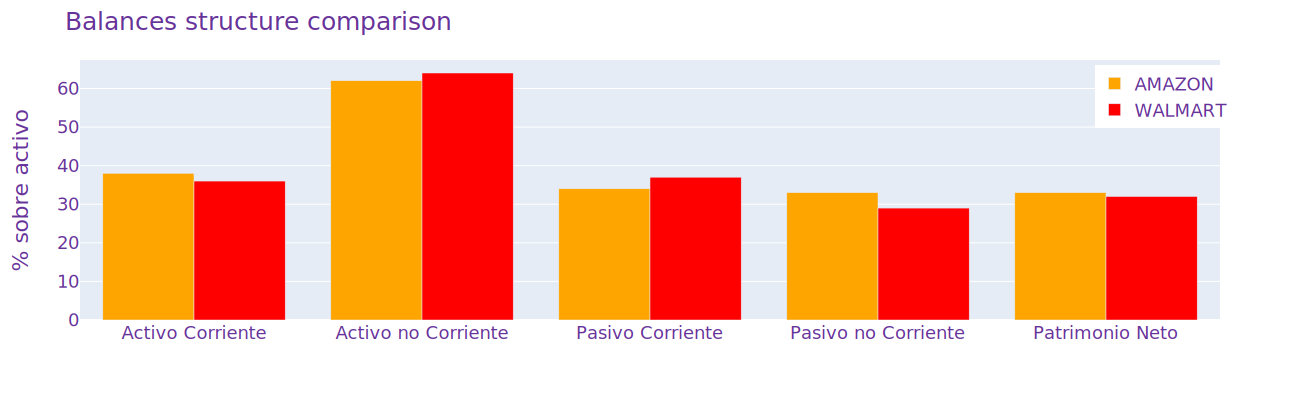

In [18]:
fig = px.bar(data_frame = comparison, x = comparison.index, y = ["AMAZON","WALMART"], barmode = "group", 
       color_discrete_sequence = ["orange","red"], width = 1300, height = 400)

fig.update_layout(
    title = "Balances structure comparison",
    xaxis_title=None,    
    yaxis_title="% sobre activo",
    legend_title="Legend Title",
    font=dict(
        size=18,
        color="RebeccaPurple"
    ),
    legend=dict(
        title = None,
        yanchor="top",
        y=0.98,
        xanchor="left",
        x=0.89
    )
)
fig.show("svg")